In [75]:
# Import the necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.metrics import accuracy_score
from sklearn.metrics import *
#from sklearn.metrics import confusion_matrix

<h2> 1. Load Data

In [76]:
# Load train file
train = pd.read_csv("../input/titanic/train.csv")
print(train.shape)
train.head(5)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
# Load test file
test = pd.read_csv("../input/titanic/test.csv")
print(test.shape)
test.head(5)

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [78]:
# to check if there is any missing value
train.info()

# Age, Cabin , Embarked showed some missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [79]:
# statistics on numerical variables for the train dataset.
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The mean value for Age is 29.7, and the maximum is 80 years old. The mean and median values for age are slightly different which is a sign of skewed distribution.

SibSp is the number of siblings and spouses for a passenger. The average value is 0.52, so almost half of the passengers traveled without siblings or spouses.

Parch is the number of parents and children traveling with a passenger. The mean value is 0.38, so almost 75% of the passengers did not travel with a parent and/or a child.

For Fare, the average price paid for a ticket was £32.20 and the maximum price was £512. The quartiles are shown, and it can be noted that the value for the upper interquartile range (IQR) is £31.00, which is much higher than the lower IQR of £7.91. This indicates a highly skewed distribution for Fare. Also, it can be noted that 75% of the passengers paid less than £31.00 for a ticket.

<h2> 2. Exploratory Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

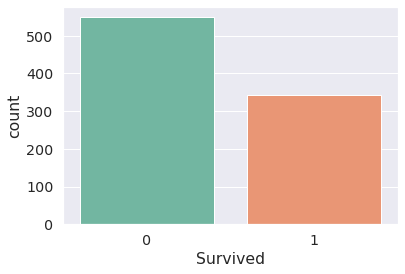

In [80]:
# Countplot of Survived
sns.countplot(x=train["Survived"], palette="Set2")

The target "Survived" contains Boolean values corresponding to people who survived (1) and people who did not survive (0).

<AxesSubplot:xlabel='Sex', ylabel='count'>

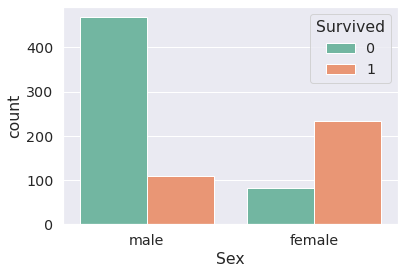

In [81]:
# Barplot of Survived by Sex
sns.countplot(data=train, x="Sex", hue="Survived", palette="Set2")

We can see that women were more likely to survive than men. More than 400 men did not survive.

In [82]:
# Survival rate by Sex
train.groupby("Sex")[["Survived"]].mean()

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

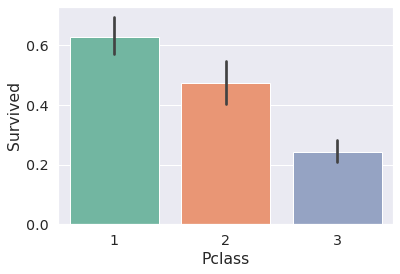

In [83]:
# Plot the survival rate of each class
sns.barplot(data=train, x="Pclass", y="Survived", palette="Set2")

There were three classes on Titanic. The plot above displayes the survival rate for each of them.For passengers in the first class the survival rate was more than 60%, while for passengers in the third class was less than 30%. Second class passangers have a more balanced survival rate. The survival rate for the third class, was the lowest from all classes

In [84]:
# Survival rate by sex and class
train.pivot_table("Survived", index="Sex", columns="Pclass")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


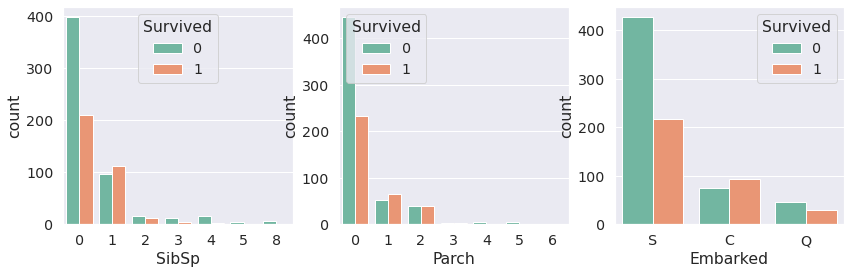

In [85]:
# Plot the survival rate by SibSp, Parch and Embarked

# Make a list of columns
cols = ["SibSp", "Parch", "Embarked"]

fig = plt.figure(figsize=(14,4))
n_rows = 1
n_cols = 3
for i in range (len(cols)):
    column = cols[i]
    sub = fig.add_subplot(n_rows, n_cols, i+1)
    chart = sns.countplot(data=train, x=column, hue="Survived", palette="Set2")

It can be noted that passengers that came alone, with no siblings or spouses were not likely to survive - about 400 passengers. Similar, we can see from the second plot that more than 400 passengers who did not have a parent or a child with them did not survive the Titanic. The third plot shows that passengers embarked from Southampton (S) were less likely to survive, while over half of the passengers departing from Queeenstown (Q) survived the accident.

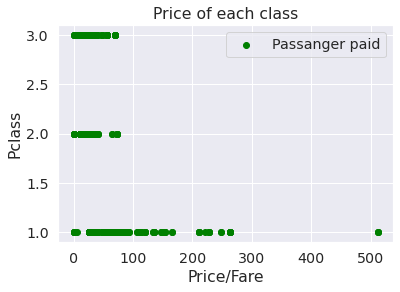

In [86]:
# Plot the prices paid for each class
plt.scatter(train["Fare"], train["Pclass"], color="green", label="Passanger paid")
plt.ylabel("Pclass")
plt.xlabel("Price/Fare")
plt.title("Price of each class")
plt.legend()
plt.show()

It can be noted that passengers that came alone, with no siblings or spouses were not likely to survive - about 400 passengers. Similar, we can see from the second plot that more than 400 passengers who did not have a parent or a child with them did not survive the Titanic. The third plot shows that passengers embarked from Southampton (S) were less likely to survive, while over half of the passengers departing from Queeenstown (Q) survived the accident.

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

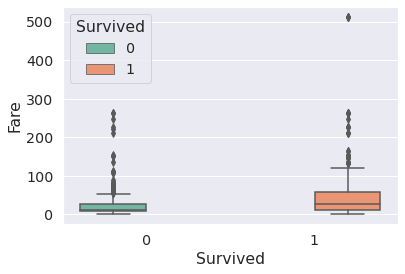

In [87]:
# Plot Survived by Fare
sns.boxplot(data=train, x="Survived", y="Fare", hue="Survived", palette="Set2") 

It can be noted that passengers who paid less than £50 were less likely to survive. Those who paid more, had a higher chance of surviving.

In [88]:
# Survival rate by age, sex and class
age = pd.cut(train["Age"], [0, 18, 80])     
train.pivot_table("Survived", ["Sex", age], "Pclass")

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

The best survival rate of 97% had women over 18 years old comparing with anyone else. In contrast, the worst survival rate had men over 18 in the second class with a survival rate of 7.14%. First class men had a survival rate of 80%, the highest for men from all classes. Men under 18, had better chances of survival for all three classes. In general, we can say that the best survival rate was for the first class and young people, both women and men.

<h2> 3. Data Cleaning

In [89]:
# Check missing values for train dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [90]:
# Check missing values for test dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

The variable Cabin has too many missing values in both train and test datasets, so we will drop the column. For the variables Age, Embarked and Fare the missing values will be imputed.\

Besides the column Cabin, with too many missing values, the columns PassengerId, Name and Ticket are redundand so we will drop them as well.

In [91]:
# Drop columns
train = train.drop(["PassengerId","Name", "Ticket", "Cabin"], axis=1)
test = test.drop([ "Name", "Ticket", "Cabin"], axis=1)

print("train data columns: ", "\n", train.columns, "\n")
print("test data columns: ", "\n", test.columns)

train data columns:  
 Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object') 

test data columns:  
 Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


**Missing values in Age**

As mentioned in the analysis above, the age survival rate depends on the class. We will impute the missing values in Age with the median corresponding to each class. The median is more robust to outliers, which makes it a better choice than the mean. Next it is defined a function to impute the age with median for each class.

In [92]:
# Define function to impute Age with median corresponding to each Pclass

def impute_age(df):
    """Function to impute missing values in Age with median corresponding to each Pclass"""
    # Get a list with classes in Pclass
    pclasses = df.Pclass.unique().tolist()
     
    for pclass in pclasses:
        # Get the median Age value for each class
        median_age = df.groupby("Pclass")["Age"].median()[pclass]     
        # Apply a mask and impute missing values with the median for each class
        df.loc[(df.Age.isnull()) & (df.Pclass == pclass), "Age"] = median_age   
        
    return df

Using the function impute_age() are imputed the missing values for Age in both train and test datasets.

In [93]:
# Impute missing values for Age in train dataset
impute_age(train)
# Check if the values are imputed
train["Age"].isnull().sum()

0

Now no null value in the Age column

The train dataset has two missing values for Embarked. We will impute them with the most frequent category "S". The test dataset has no missing values for the Embarked variable.

In [94]:
# Impute missing values with the most frequent category "S"
train.loc[:, "Embarked"] = train.loc[:, "Embarked"].fillna("S")
# Check if the values are imputed
train['Embarked'].isnull().sum()

0

**Missing values in Fare**

In the test dataset there is only one missing value for Fare. Variable Fare is of floating-point type, so we will use the median to impute the missing value.

In [95]:
# Replace the missing value in Fare with median
HasNan = np.isnan(test.loc[:, "Fare"]) # np.isnan() function tests element-wise whether it is NaN or not and returns the result as a boolean array
test.loc[HasNan, "Fare"] = np.nanmedian(test.loc[:, "Fare"])
test["Fare"].isnull().sum()

0

**Replace categories with numeric(Encoding)**

The variables Sex and Embarked are of type object. We will replace the categories in these variables with numeric values.

In [96]:
# Print unique values in Sex and Embarked columns
print(train["Sex"].unique())
print(train["Embarked"].unique())

['male' 'female']
['S' 'C' 'Q']


In [97]:
# Labeling
# Map Sex and Embarked to numerical values in train set
train["Sex"] = train["Sex"].map({"female": 1, "male": 0})
train["Embarked"] = train["Embarked"].map({"S" : 1, "C" : 2, "Q" : 3})

# Map Sex and Embarked to numerical values in test set
test["Sex"] = test["Sex"].map({"female": 1, "male": 0})
test["Embarked"] = test["Embarked"].map({"S" : 1, "C" : 2, "Q" : 3})

print(train["Sex"].unique())
print(train["Embarked"].unique())

[0 1]
[1 2 3]


**Bin variable Age**

Next we will bin the variable Age in five bins, between 0 and 80, for both train and test datasets.

In [98]:
# Bin variable Age in train set

# List with bin limits
bins_age = [0, 16, 28, 36, 62, 80]
# List for bin labels
age_categ = ["0_16", "16_28", "28_36", "36_62", "62_80"]
# Use pd.cut() for binning
binAge = pd.cut(train.loc[:, "Age"], bins_age, labels=age_categ)
# Add binned Age to dataset
train["Age"] = binAge
# Add binned Age to dataset
train["Age"] = binAge
# Check the counts
train.loc[:, "Age"].value_counts()

16_28    398
36_62    210
28_36    168
0_16     100
62_80     15
Name: Age, dtype: int64

In [99]:
# Bin variable Age in test set

# List with bin limits
bins_age = [0, 16, 28, 36, 62, 80]
# List for bin labels
age_categ = ["0_16", "16_28", "28_36", "36_62", "62_80"]
# Use pd.cut() for binning
binAge = pd.cut(test.loc[:, "Age"], bins_age, labels=age_categ)
# Add binned Age to dataset
test["Age"] = binAge
# Check the counts
test.loc[:, "Age"].value_counts()

16_28    140
36_62     89
28_36     62
0_16      34
62_80      7
Name: Age, dtype: int64

**Scale data**

The values for Fare are much larger than the rest of variables. The values need to be scaled so they are on a similar range with the rest of features before building the models. For scaling it is used the MinMax scaler which translates the values between 0 and 1.

In [100]:
# Scale the Fare variable in train dataset
fare = train.loc[:, ["Fare"]]    
scaler = MinMaxScaler().fit(fare)        
fare_scaled = scaler.transform(fare)        
train.loc[:, "Fare"] = fare_scaled 
train.head(5)



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,16_28,1,0,0.014151,1
1,1,1,1,36_62,1,0,0.139136,2
2,1,3,1,16_28,0,0,0.015469,1
3,1,1,1,28_36,1,0,0.103644,1
4,0,3,0,28_36,0,0,0.015713,1


In [101]:
# Scale Fare variable in test dataset
fare = test.loc[:, ["Fare"]]
scaler = MinMaxScaler().fit(fare)
fare_scaled = scaler.transform(fare)
test.loc[:, "Fare"] = fare_scaled
test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,28_36,0,0,0.015282,3
1,893,3,1,36_62,1,0,0.013663,1
2,894,2,0,36_62,0,0,0.018909,3
3,895,3,0,16_28,0,0,0.016908,1
4,896,3,1,16_28,1,1,0.023984,1


<h2> 4. Build models</h2>

With data prepared we can start building classification models for predicting the survival on Titanic. The performance of the models is compared by assesing the accuracy score for each of them.

Below are created the X and y sets for the features and the target. The dataset is split into training and testing sets using the "train_test_split" function from sklearn. For training the model is used 80% of the data and the rest of 20% is used for testing.

In [102]:
# Create the target
y = train["Survived"]

# Create the features
# Get dummies
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = pd.get_dummies(train[features])
print(X.shape)
X.head()

(891, 11)


,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_0_16,Age_16_28,Age_28_36,Age_36_62,Age_62_80
0,3,0,1,0,0.014151,1,0,1,0,0,0
1,1,1,1,0,0.139136,2,0,0,0,1,0
2,3,1,0,0,0.015469,1,0,1,0,0,0
3,1,1,1,0,0.103644,1,0,0,1,0,0
4,3,0,0,0,0.015713,1,0,0,1,0,0


In [103]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 11) (712,)
(179, 11) (179,)


The function below trains and applies multiple classification models, then calculates the testing accuracy for each of them. For each model it was applied hyperparameter tunning with the goal to improve the performance of the model.

In [104]:
# Create a function with many ML models

def models(X_train, y_train, X_test, y_test):
    """Function to train and apply models then calculate the accuracy score"""
    
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=4, random_state = 0)  
    tree.fit(X_train, y_train)
    tree_pred = tree.predict(X_test)
    
    # Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=5, random_state=0)
    forest.fit(X_train, y_train)
    forest_pred = forest.predict(X_test)
    
    # Gradient Boosting Classifier
    from sklearn.ensemble import GradientBoostingClassifier
    grad = GradientBoostingClassifier(n_estimators=100, loss='deviance', learning_rate=0.05, max_depth=5, min_samples_leaf=5)
    grad.fit(X_train, y_train)
    grad_pred = grad.predict(X_test)
    
     
    # LogisticRegression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(max_iter=5000, random_state = 0)   # max_iter=1000
    log.fit(X_train, y_train)
    log_pred = log.predict(X_test)
    
    # KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    
    # SVC (linear kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state=0)
    svc_lin.fit(X_train, y_train)
    svc_lin_pred = svc_lin.predict(X_test)
    
    # SVC (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state=0)
    svc_rbf.fit(X_train, y_train)
    svc_rbf_pred = svc_rbf.predict(X_test)
    
    # GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    gauss_pred = gauss.predict(X_test)
      
    # Print testing accuracy for each model
    print("Testing accuracy")
    print("[0] Decision Tree Testing Accuracy: {:.2%}".format(accuracy_score(y_test, tree_pred)))
    print("[1] Random Forest Testing Accuracy: {:.2%}".format(accuracy_score(y_test, forest_pred)))
    print("[2] Gradient Boosting Testing Accuracy: {:.2%}".format(accuracy_score(y_test, grad_pred)))
    print("[3] Logistic Regression Testing Accuracy : {:.2%}".format(accuracy_score(y_test, log_pred)))
    print("[4] SVC Linear Testing Accuracy: {:.2%}".format(accuracy_score(y_test, svc_lin_pred)))
    print("[5] SVC RBF TestingAccuracy: {:.2%}".format(accuracy_score(y_test, svc_rbf_pred)))
    print("[6] KNeighbors  TestingAccuracy: {:.2%}".format(accuracy_score(y_test, knn_pred)))
    print("[7] GaussianNB TestingAccuracy: {:.2%}".format(accuracy_score(y_test, gauss_pred)))
    
    return tree, forest, grad, log, svc_lin, svc_rbf, knn, gauss

In [105]:
model = models(X_train, y_train, X_test, y_test)

Testing accuracy
[0] Decision Tree Testing Accuracy: 79.33%
[1] Random Forest Testing Accuracy: 79.33%
[2] Gradient Boosting Testing Accuracy: 79.33%
[3] Logistic Regression Testing Accuracy : 79.89%
[4] SVC Linear Testing Accuracy: 77.65%
[5] SVC RBF TestingAccuracy: 78.21%
[6] KNeighbors  TestingAccuracy: 74.86%
[7] GaussianNB TestingAccuracy: 72.63%


The Random Forest, Decision Tree, Gradient Boosting and Logistic Regression models have a high accuracy score of more than 79%. They are followed by SVC RBF and SVC Linear kernel with a score of ~ 78%. The lowest accuracy have KNeighbors and GaussianNB with 72-74%.

<h3> Confusion Matrix for Random Forest model </h3>

The Random Forest model has one of the highest accuracy score. To asses its performance, we visualize below the confusion matrix.

In [106]:
# Confusion Matrix for Random Forest model
cm = confusion_matrix(y_test, model[1].predict(X_test))
print ('\nConfusion Matrix for the Random Forest model:\n ', cm)
tn, fp, fn, tp = cm.ravel()
print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)


Confusion Matrix for the Random Forest model:
  [[100   6]
 [ 31  42]]

TP, TN, FP, FN: 42 , 100 , 6 , 31


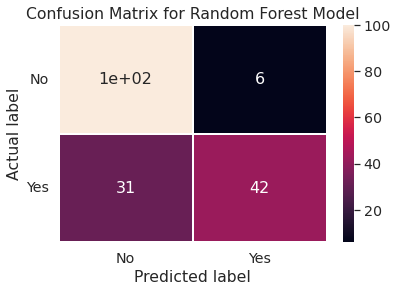

In [107]:
# Build the Confusion Matrix plot for the Random Forest model
plt.figure(figsize=(6,4))
sns.set(font_scale=1.3)            
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, linewidths=0.2) 

class_names = ['No', 'Yes']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks2, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

The Confusion Matrix for the Random Forest model has high values on the main diagonal for the True Positives (42) and the True Negatives (100). This indicates a good performance for the classifier. The number of False Negatives (31), people classified as dead but who survived, is higher than the number of False Positives (6), people wrongly predicted as survived.

Next are determined the evaluation metrics for the Random Forest model. These include the Error rate, Precision, Recall (Sensitivity) and F1 score.

In [108]:
predictions = model[1].predict(X_test)

# Determine Accuracy rate
AR = accuracy_score(y_test, predictions)
print ("Accuracy rate:", np.round(AR, 2))

# Calculate the Error rate
ER = 1.0 - AR
print ("Error rate:", np.round(ER, 2))

# Determine Precision
P = precision_score(y_test, predictions)
print ("Precision:", np.round(P, 2))

# Determine Recall
R = recall_score(y_test, predictions)
print ("Recall:", np.round(R, 2))

# Determine F1 score
F1 = f1_score(y_test, predictions)
print ("F1 score:", np.round(F1, 2))

Accuracy rate: 0.79
Error rate: 0.21
Precision: 0.88
Recall: 0.58
F1 score: 0.69


The Accuracy rate for the random forest model is high (0.79). The Error rate, the ratio between the erroneous predictions and all predictions, is low with a value of 0.21. The F1 score, which considers both Precision and Recall has a reasonably good value of 0.69. Precision, the accuracy of a predicted positive outcome, has a high value of 0.88 and the Recall, the percent of all values of 1 correctly classified as 1, has a value of almost 0.6.

In [110]:
# # Save predictions
# # create a dataframe for output values
 output = pd.DataFrame({"PassengerId": test.PassengerId, 
#                      "Survived": predictions})
# # save the df to file
 output.to_csv("submission.csv", index=False)
 print("Your submission was succefully saved!")

# # Submission score for Random Forest Classifier: 0.77272